In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import pickle

plt.rcParams['figure.figsize'] = (12.0, 10.0)

In [3]:
types = {'StateHoliday': np.dtype(str)}
train = pd.read_csv("datasets/train.csv", parse_dates=[2], dtype=types, nrows=600000)
store = pd.read_csv("datasets/store.csv")

In [4]:
class Information:
    def __init__(self):
        print("Information object created")
    
    def _get_missing_values(self, data):
        # getting sum of missing values for each feature
        missing_values = data.isnull().sum()
        # feature missing values are sorted from few to many
        missing_values.sort_values(ascending=False, inplace=True)
        
        return missing_values

In [5]:
class Preprocess:
    def __init__(self):
        print("Preprocess object created")
    
    def remove_no_sales(self, train):
        not_open = train[(train['Open'] == 0) & (train['Sales'] != 0)]
        print("No closed store with sales: "+str(not_open.size == 0))
        train = train.loc[train['Sales'] > 0]
        return train
    
    def date_range(self, train):
        dates = pd.to_datetime(train['Date'], format="%Y%m%d:%H:%M:%S.%f").sort_values()
        dates = dates.unique()
        start_date = dates[0]
        end_date = dates[-1]
        print("Start Date: ", start_date)
        print("End Date: ", end_date)
        data_range = pd.date_range(start_date, end_date).values

In [6]:
pr1 = Preprocess()
pr1.remove_no_sales(train)
pr1.date_range(train)

Preprocess object created
No closed store with sales: True
Start Date:  2013-12-27T00:00:00.000000000
End Date:  2015-07-17T00:00:00.000000000


In [7]:
class Datavisualization:
    def __init__(self) -> None:
        print("Data Visulation object created")
    
    def sales_per_day(self, train):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        f, ax = plt.subplots(7, sharex=True, sharey=True)
        plt.rcParams['figure.figsize'] = (10.0, 50.0)
        for i in range(1, 8):
            mask = train[train['DayOfWeek'] == i]
            ax[i - 1].set_title("Day {0}".format(i))
            ax[i - 1].scatter(mask['Customers'], mask['Sales'], label=i)
        plt.legend()
        plt.xlabel('Customers')
        plt.ylabel('Sales')
        plt.savefig('graphs/output1.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def sales_per_customer(self,train):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        plt.scatter(train['Customers'], train['Sales'], c=train['DayOfWeek'], alpha=0.8, cmap=plt.cm.get_cmap('plasma'))
        plt.colorbar()
        plt.xlabel('Customers')
        plt.ylabel('Sales')
        plt.savefig('graphs/output2.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def state_holiday(self,train):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        for i in ["0", "a", "b", "c"]:
            data = train[train['StateHoliday'] == i]
            if (len(data) == 0):
                continue
            plt.scatter(data['Customers'], data['Sales'], label=i)
        plt.legend()
        plt.xlabel('Customers')
        plt.ylabel('Sales')
        plt.savefig('graphs/output3.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def school_holiday(self,train):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        for i in [0, 1]:
            data = train[train['SchoolHoliday'] == i]
            if (len(data) == 0):
                continue
            plt.scatter(data['Customers'], data['Sales'], label=i)
        plt.legend()
        plt.xlabel('Customers')
        plt.ylabel('Sales')
        plt.savefig('graphs/output4.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def promo(self,train):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        for i in [0, 1]:
            data = train[train['Promo'] == i]
            if (len(data) == 0):
                continue
            plt.scatter(data['Customers'], data['Sales'], label=i)
        plt.legend()
        plt.xlabel('Customers')
        plt.ylabel('Sales')
        plt.savefig('graphs/output5.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def store_type(self,store):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        for i in ['a', 'b', 'c', 'd']:
            data = store[store['StoreType'] == i]
            if(len(data) == 0):
                continue
            plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)
        plt.legend()
        plt.xlabel('Average Customers')
        plt.ylabel('Average Sales')
        plt.savefig('graphs/output6.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def assortment(self,store):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        for i in ['a', 'b', 'c']:
            data = store[store['Assortment'] == i]
            if (len(data) == 0):
                continue
            plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)
        plt.legend()
        plt.xlabel('Average Customers')
        plt.ylabel('Average Sales')
        plt.savefig('graphs/output7.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def promo2(self,store):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        for i in [0, 1]:
            data = store[store['Promo2'] == i]
            if (len(data) == 0):
                continue
            plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)

        plt.legend()
        plt.xlabel('Average Customers')
        plt.ylabel('Average Sales')
        plt.savefig('graphs/output8.png', dpi=300, bbox_inches='tight')
        plt.show()

    def fill_na_values(self,store):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        # fill NaN values
        store["CompetitionDistance"].fillna(-1)
        plt.scatter(store['CompetitionDistance'], store['AvgSales'])

        plt.xlabel('CompetitionDistance')
        plt.ylabel('Average Sales')
        plt.savefig('graphs/output9.png', dpi=300, bbox_inches='tight')
        plt.show()
        return store
    
    def add_store(self,train,store):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        train['SalesPerCustomer'] = train['Sales'] / train['Customers']
        avg_store = train.groupby('Store')[['Sales', 'Customers', 'SalesPerCustomer']].median()
        avg_store.rename(columns=lambda x: 'Avg' + x, inplace=True)
        store = pd.merge(avg_store.reset_index(), store, on='Store')
        return store

In [8]:
class Features:
    def __init__(self):
        print("Features object created")
    
    def string_to_int(self, store, train):
        store['StoreType'] = store['StoreType'].astype('category').cat.codes
        store['Assortment'] = store['Assortment'].astype('category').cat.codes
        train["StateHoliday"] = train["StateHoliday"].astype('category').cat.codes
        merged = pd.merge(train, store, on='Store', how='left')
        return merged
    
    def remove_nan(self, merged):
        NaN_replace = 0
        merged.fillna(NaN_replace, inplace=True)
        merged['Year'] = merged.Date.dt.year
        merged['Month'] = merged.Date.dt.month
        merged['Day'] = merged.Date.dt.day
        merged['Week'] = merged.Date.dt.week
        return merged
    
    def Month_Competitions(self, merged):
        #number of months that competition has exited for
        NaN_replace = 0
        merged['MonthsCompetitionOpen'] = 12 * (merged['Year'] - merged['CompetitionOpenSinceYear']) + \
        (merged['Month'] - merged['CompetitionOpenSinceMonth'])
        merged.loc[merged['CompetitionOpenSinceYear'] == NaN_replace, 'MonthsCompetionOpen'] = NaN_replace
        return merged
    
    def Weeks_promo_open(self,merged):
        # Number of weeks that promotion has existed for
        NaN_replace = 0
        merged['WeeksPromoOpen'] = 12 * (merged['Year'] - merged['Promo2SinceYear']) + \
        (merged['Date'].dt.weekofyear - merged['Promo2SinceWeek'])
        merged.loc[merged['Promo2SinceYear'] == NaN_replace, 'WeeksPromoOpen'] = NaN_replace
        return merged
    
    def to_int(self,merged):
        toInt = [
            'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear',
            'Promo2SinceWeek', 
            'Promo2SinceYear', 
            'MonthsCompetitionOpen', 
            'WeeksPromoOpen'
        ]
        merged[toInt] = merged[toInt].astype(int)
        return merged
    
    def add_mean(self,train,store):
        med_store = train.groupby('Store')[['Sales', 'Customers', 'SalesPerCustomer']].mean()
        med_store.rename(columns=lambda x: 'Med' + x, inplace=True)
        store = pd.merge(med_store.reset_index(), store, on='Store')
        return store

In [9]:
train_info = Information()
train_info._get_missing_values(train)

Information object created


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Id               0
dtype: int64

In [10]:
store_info = Information()
store_info._get_missing_values(store)

Information object created


Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
CompetitionDistance            3
Store                          0
StoreType                      0
Assortment                     0
Promo2                         0
dtype: int64

In [11]:
train_preprocess = Preprocess()
train = train_preprocess.remove_no_sales(train)
train_preprocess.date_range(train)

Preprocess object created
No closed store with sales: True
Start Date:  2013-12-27T00:00:00.000000000
End Date:  2015-07-17T00:00:00.000000000


In [12]:
EDA = Datavisualization()

Data Visulation object created


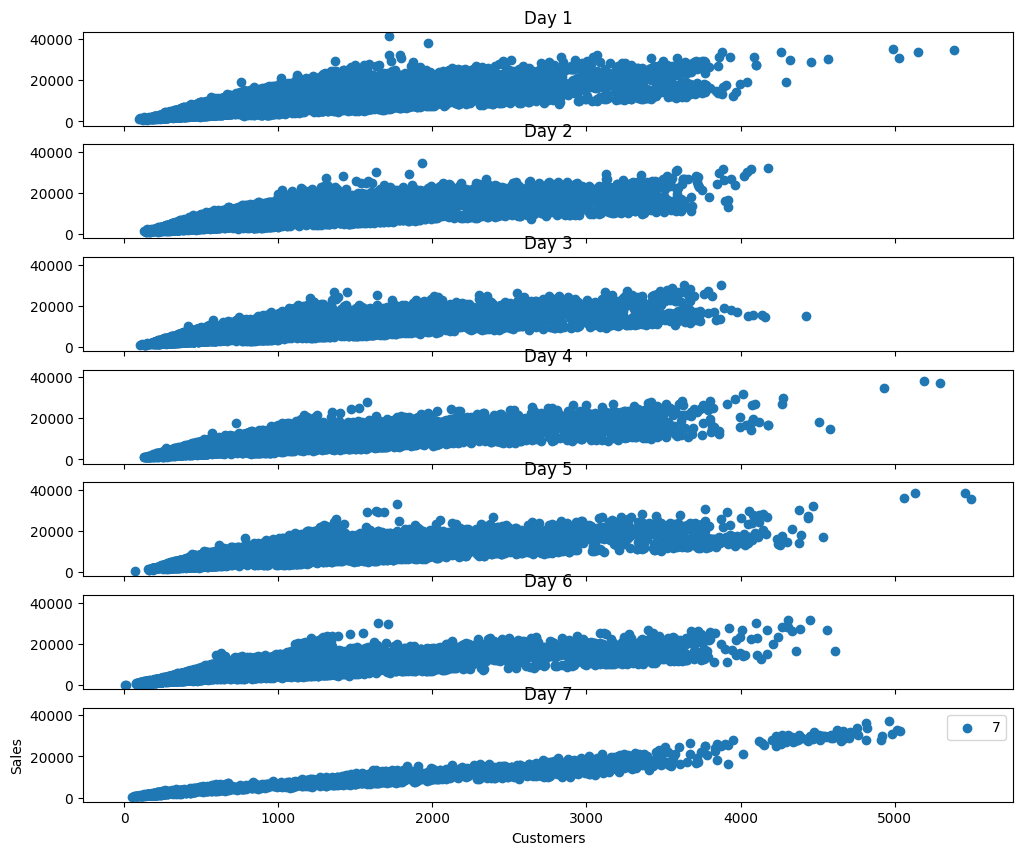

In [13]:
EDA.sales_per_day(train)

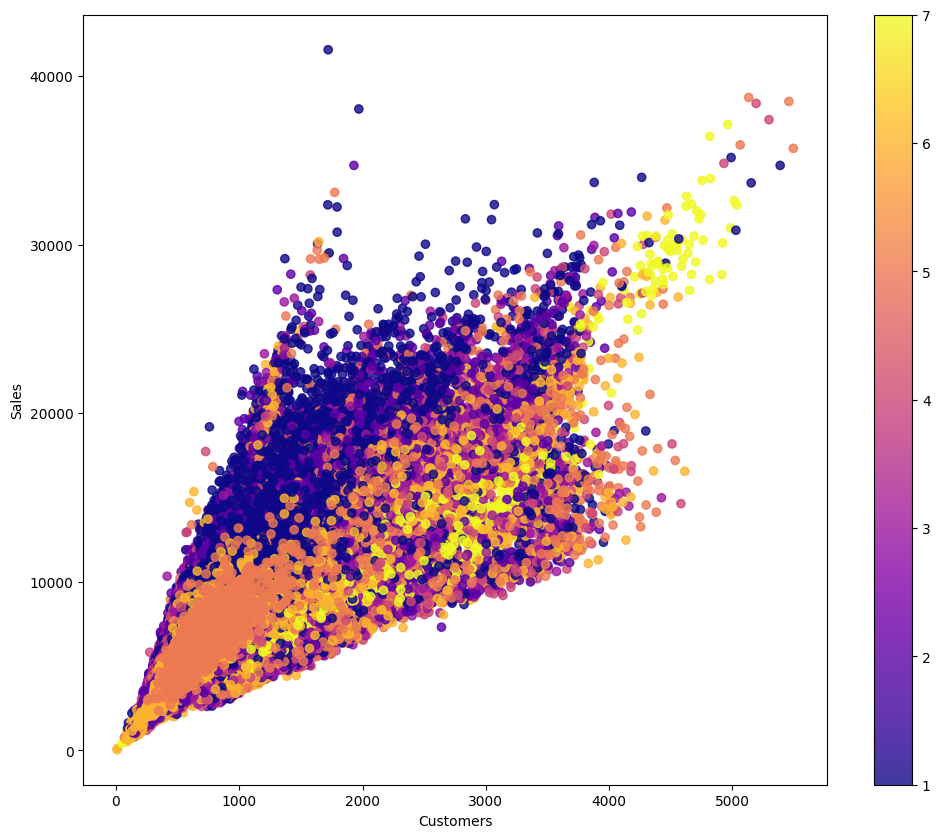

In [14]:
EDA.sales_per_customer(train)

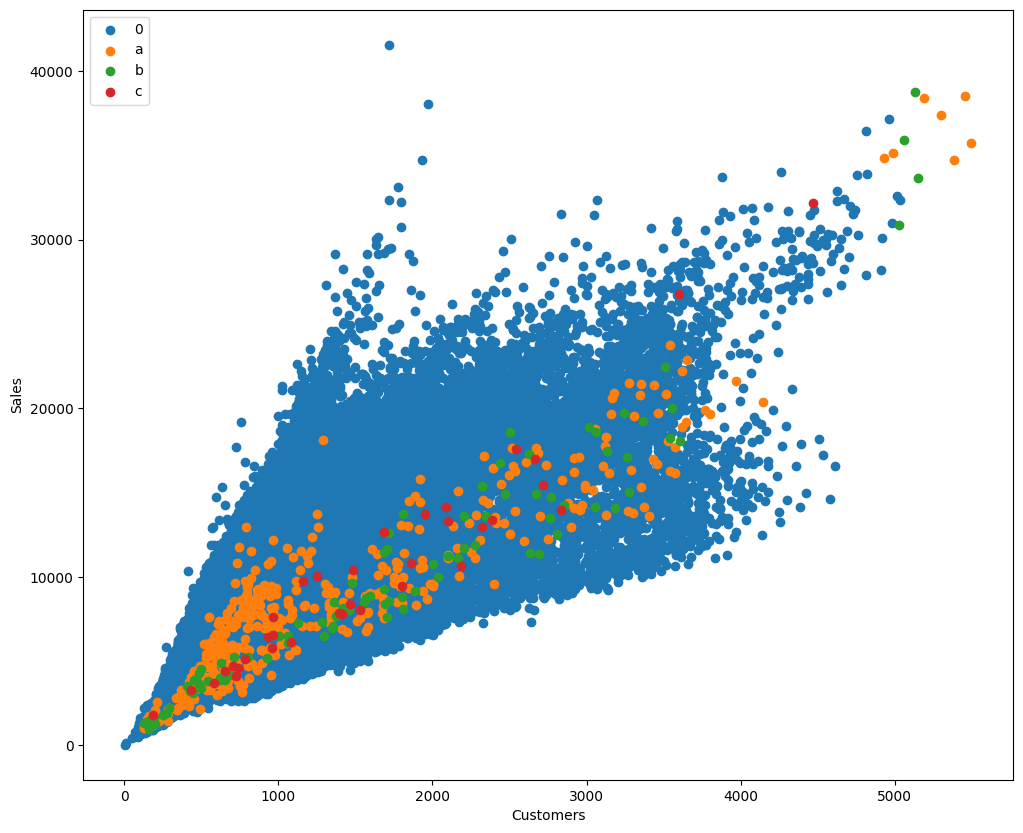

In [15]:
EDA.state_holiday(train)

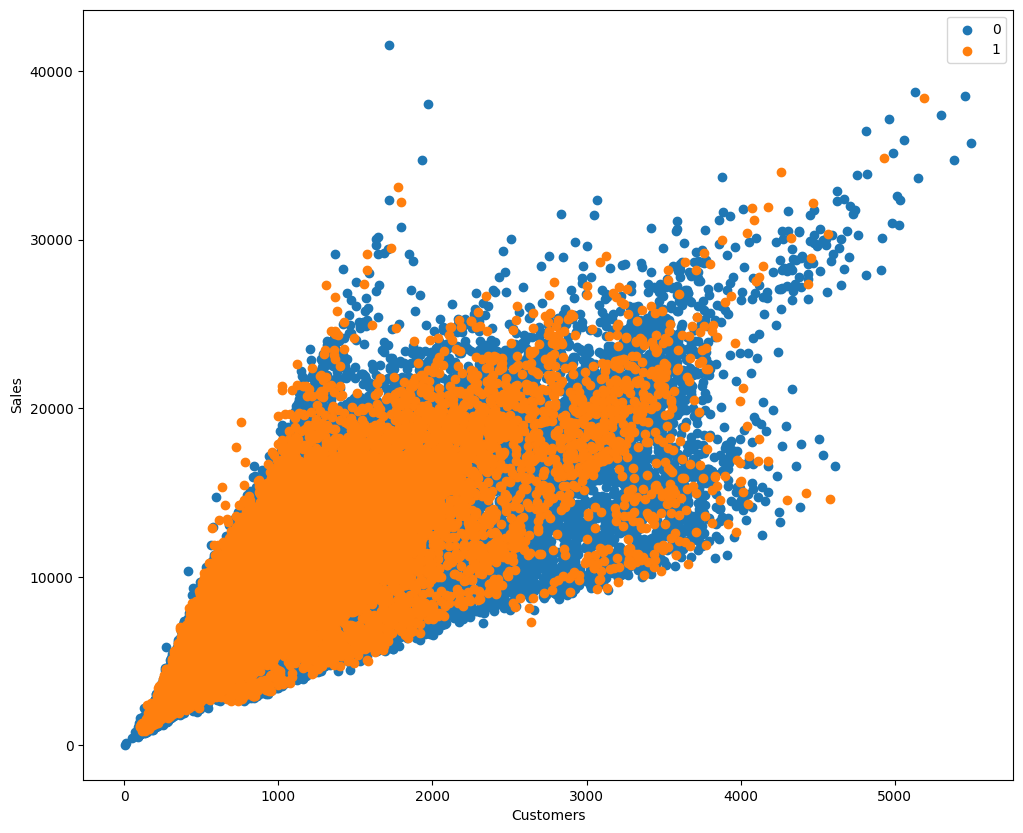

In [16]:
EDA.school_holiday(train)

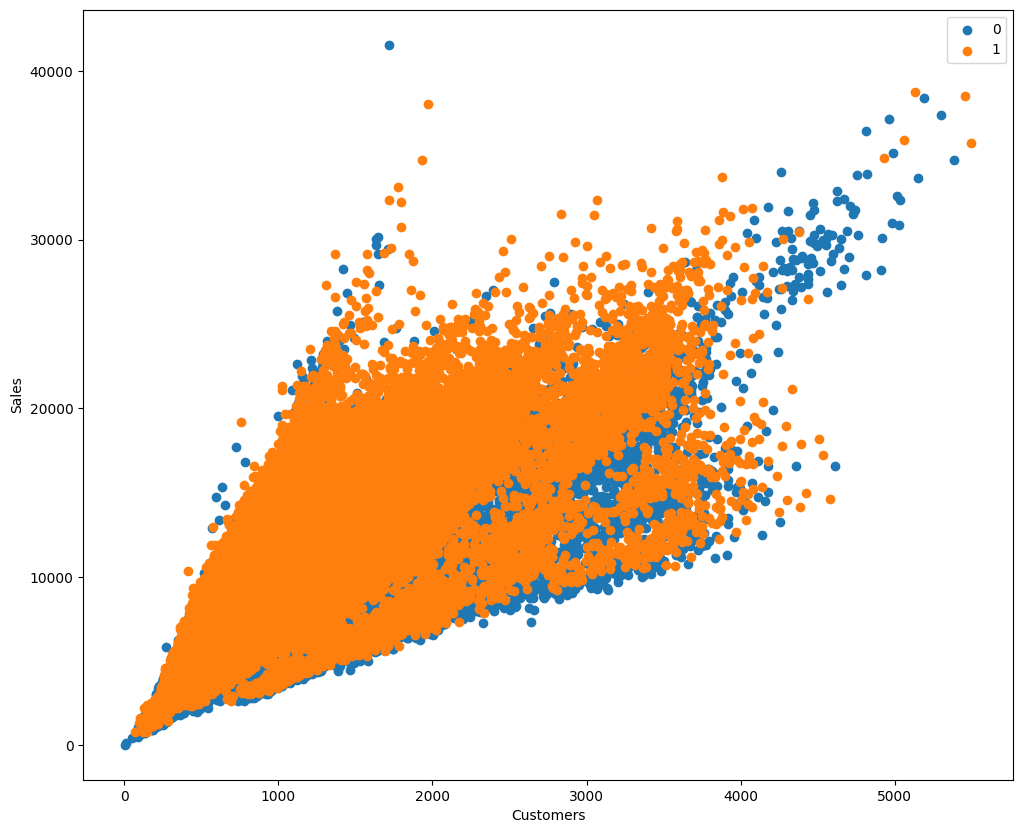

In [17]:
EDA.promo(train)

In [18]:
store = EDA.add_store(train,store)

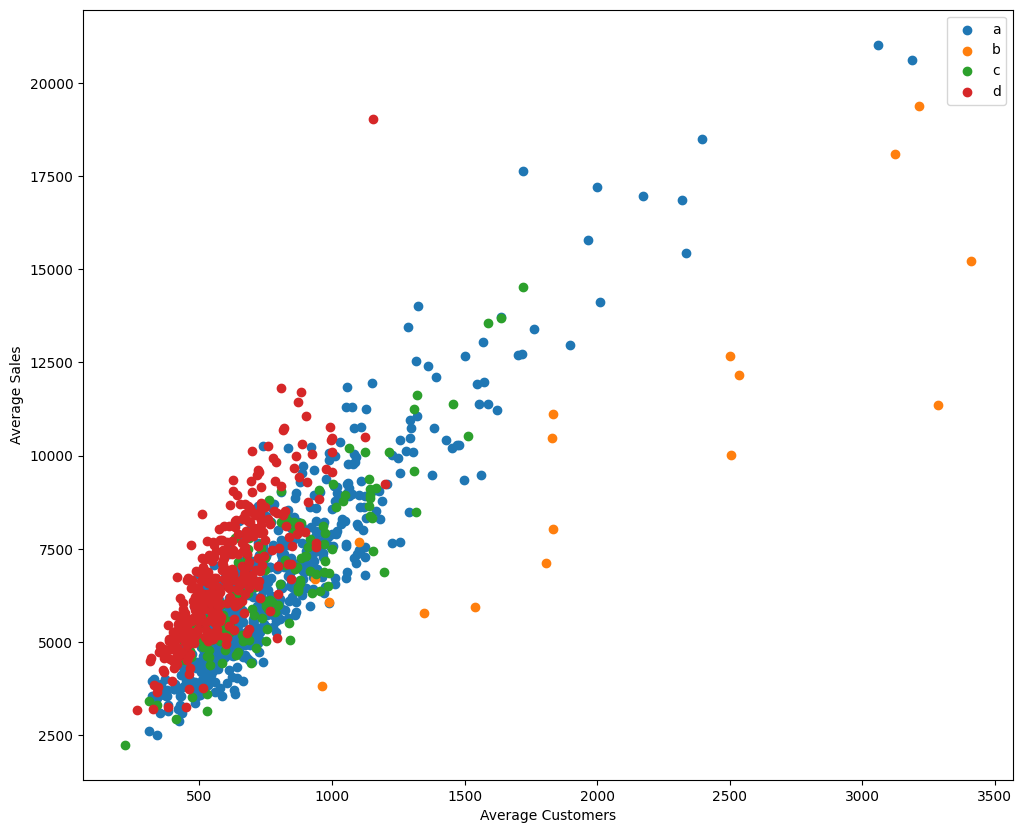

In [19]:
EDA.store_type(store)

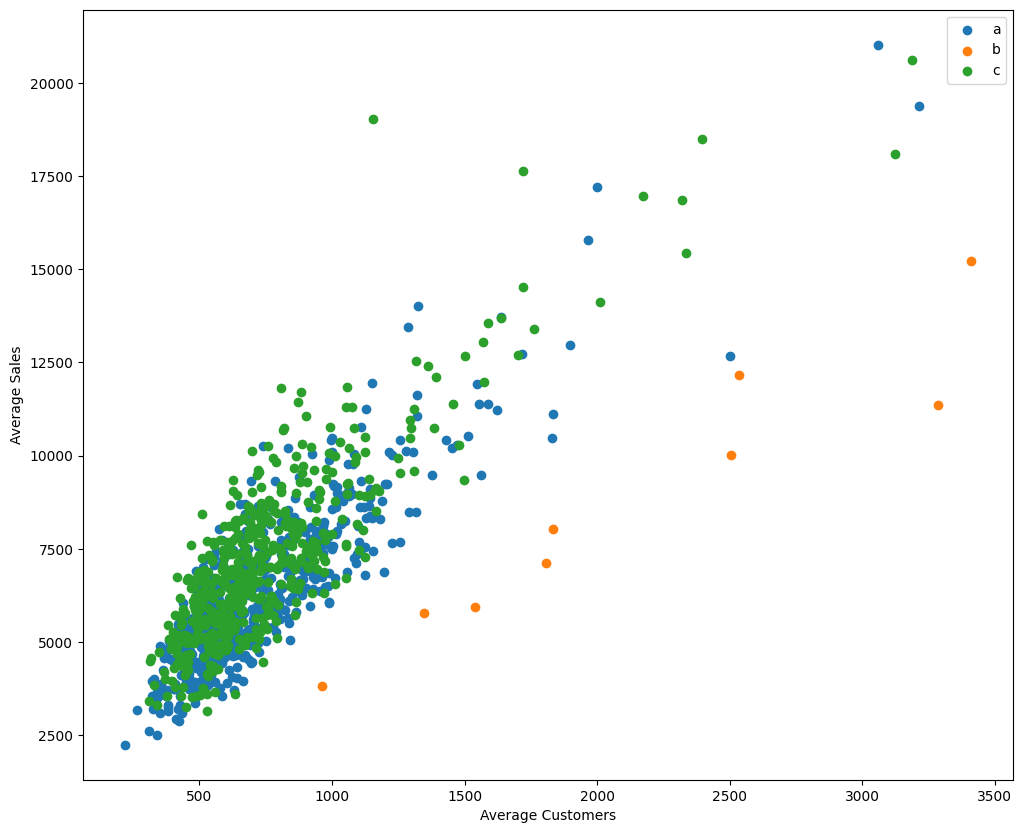

In [20]:
EDA.assortment(store)

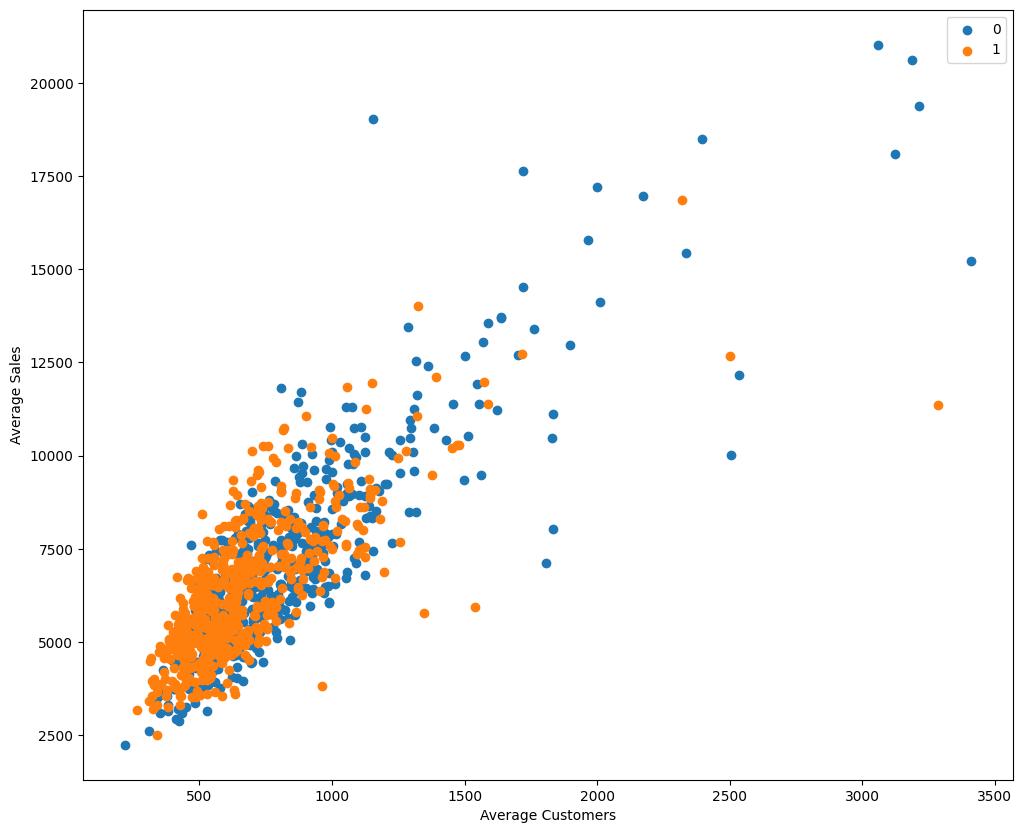

In [21]:
EDA.promo2(store)

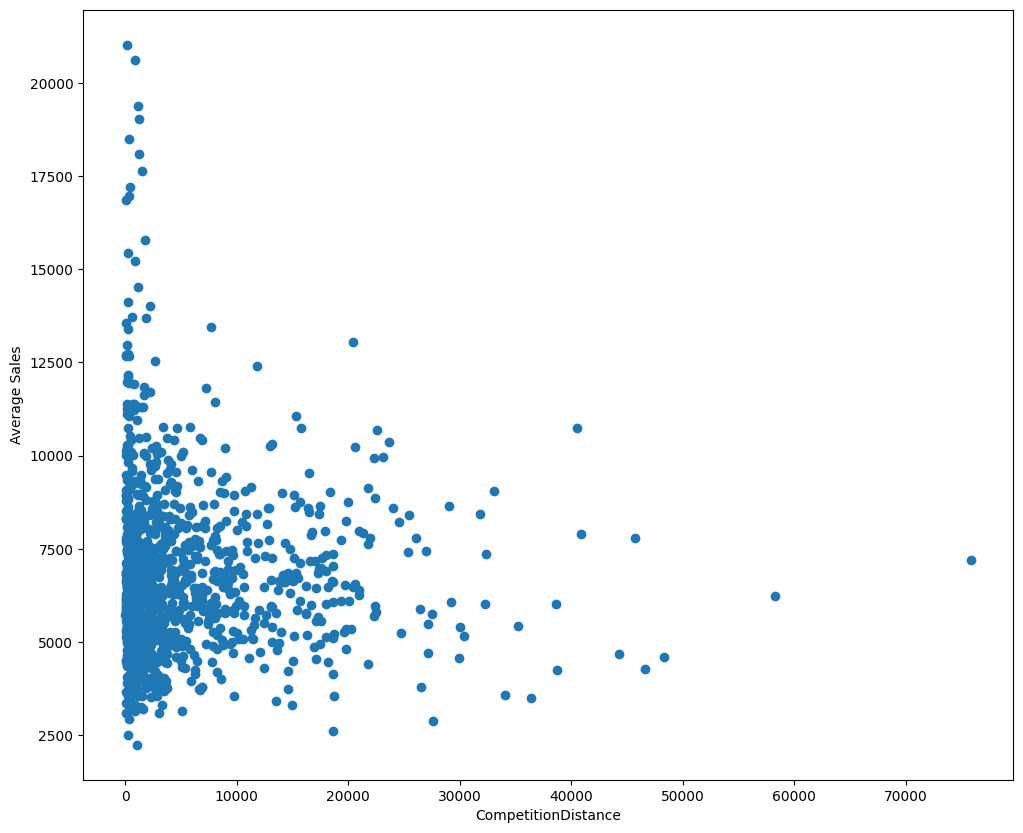

In [22]:
store = EDA.fill_na_values(store)

In [23]:
feature_selection = Features()

Features object created


In [24]:
store = feature_selection.add_mean(train, store)

In [25]:
merge = feature_selection.string_to_int(store, train)

In [26]:
merge = feature_selection.remove_nan(merge)

In [27]:
merge = feature_selection.Month_Competitions(merge)

In [28]:
merge = feature_selection.Weeks_promo_open(merge)
merge = feature_selection.to_int(merge)

In [29]:
merge['CompetitionDistance'] = np.log(merge['CompetitionDistance'] + 1)

In [30]:
merge['CompetitionDistance']

0          7.147559
1          6.347389
2          9.556126
3          6.431331
4         10.305982
            ...    
497274     9.710570
497275     8.039480
497276     5.638355
497277     7.878913
497278     6.478510
Name: CompetitionDistance, Length: 497279, dtype: float64

In [31]:
X = [
    'Store', 
    'Customers',
    'CompetitionDistance', 

    'Promo', 
    'Promo2', 
    
    'StateHoliday',
    'StoreType',
    'Assortment',

    'AvgSales',
    'AvgCustomers',
    'AvgSalesPerCustomer',
    
    'MedSales',
    'MedCustomers',
    'MedSalesPerCustomer',

    'DayOfWeek',
    'Week',
    'Day',
    'Month',
    'Year',

    'CompetitionOpenSinceMonth',
    'CompetitionOpenSinceYear',
    'Promo2SinceWeek',
    'Promo2SinceYear',

#     'MonthsCompetitionOpen',
#     'WeeksPromoOpen'
]
X_train, X_test, y_train, y_test = train_test_split(merge[X], merge['Sales'], test_size=0.1, random_state=10)

In [32]:
# Error calculating function according to kaggle
def rmspe(y, y_hat):
    return np.sqrt(np.mean(((y - y_hat) / y) ** 2))

rmpse_scorer = make_scorer(rmspe, greater_is_better = False) # Loss function

def score(model, X_train, y_train, y_test, y_hat):
    score = cross_val_score(model, X_train, y_train, scoring=rmpse_scorer, cv=5)
    print('Mean', score.mean())
    print('Variance', score.var())
    print('RMSPE', rmspe(y_test, y_hat))

def plot_importance(model):
    k = list(zip(X, model.feature_importances_))
    k.sort(key=lambda tup: tup[1])

    labels, vals = zip(*k)
    
    plt.barh(np.arange(len(X)), vals, align='center')
    plt.yticks(np.arange(len(X)), labels)

In [33]:
import xgboost as xgb

In [34]:
def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

xgboost_tree = xgb.XGBRegressor(
    n_estimators = 1000,
    max_depth = 2,
    tree_method = 'exact',
    reg_alpha = 0.05,
    silent = 0,
    random_state = 1023
)
xgboost_tree.fit(X_train[X], np.log1p(y_train), 
                 eval_set = [(X_train[X], np.log1p(y_train)), (X_test[X], np.log1p(y_test))],
                 eval_metric = rmspe_xg,
                 early_stopping_rounds = 300
                )
filename="Private_score.sav"
pickle.dump(xgboost_tree, open(filename,"wb"))

[0]	validation_0-rmse:0.34608	validation_0-rmspe:0.44173	validation_1-rmse:0.34732	validation_1-rmspe:0.44649
[1]	validation_0-rmse:0.29825	validation_0-rmspe:0.37608	validation_1-rmse:0.29926	validation_1-rmspe:0.38052
[2]	validation_0-rmse:0.25969	validation_0-rmspe:0.33214	validation_1-rmse:0.26070	validation_1-rmspe:0.33815
[3]	validation_0-rmse:0.23421	validation_0-rmspe:0.30031	validation_1-rmse:0.23519	validation_1-rmspe:0.30808
[4]	validation_0-rmse:0.21180	validation_0-rmspe:0.26906	validation_1-rmse:0.21289	validation_1-rmspe:0.27653
[5]	validation_0-rmse:0.19272	validation_0-rmspe:0.25324	validation_1-rmse:0.19398	validation_1-rmspe:0.26176
[6]	validation_0-rmse:0.17840	validation_0-rmspe:0.22868	validation_1-rmse:0.17975	validation_1-rmspe:0.23632
[7]	validation_0-rmse:0.16742	validation_0-rmspe:0.22018	validation_1-rmse:0.16873	validation_1-rmspe:0.22818
[8]	validation_0-rmse:0.15847	validation_0-rmspe:0.19781	validation_1-rmse:0.15967	validation_1-rmspe:0.20424
[9]	valida

Note that this is not in percentage, thus not to scale of graphs above


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

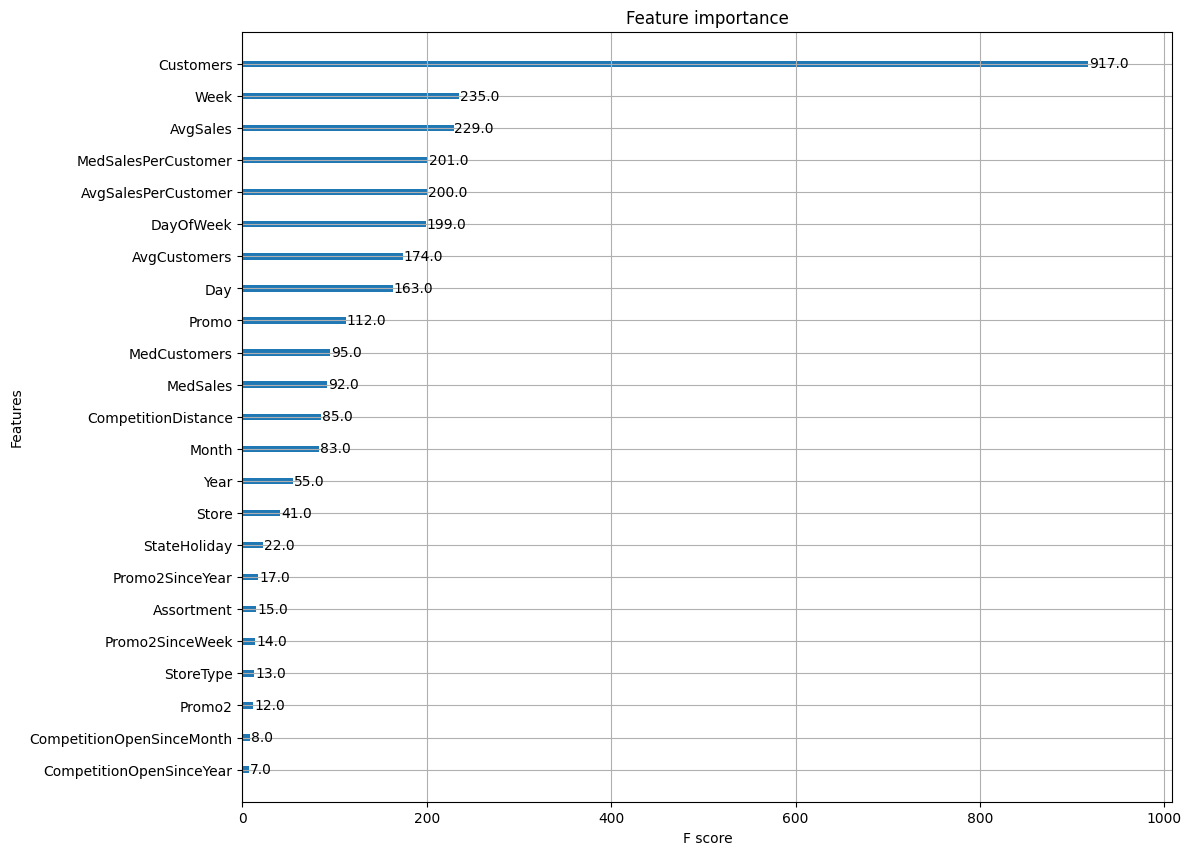

In [35]:
print("Note that this is not in percentage, thus not to scale of graphs above")
xgb.plot_importance(xgboost_tree)

In [39]:
types = {'StateHoliday': np.dtype(str)}
test = pd.read_csv("datasets/test.csv", parse_dates=[3], dtype=types)
feature_selection = Features()
test_merge = feature_selection.string_to_int(store,test)
test_merge = feature_selection.remove_nan(test_merge)
test_merge = feature_selection.Month_Competitions(test_merge)
test_merge = feature_selection.Weeks_promo_open(test_merge)
test_merge = feature_selection.to_int(test_merge)
test_merge.shape
test_merge['CompetitionDistance'] = np.log(test_merge['CompetitionDistance'])
test = test_merge
y_hat = np.expm1(xgboost_tree.predict(test[X]))
ids = test.Id
df = pd.DataFrame({"Id": ids, 'Sales': y_hat})
df.loc[test['Open'] == 0, 'Sales'] = 0
# df = df[df.Sales != 0]
df.to_csv('datasets/submission.csv', index=False)
print('Sales report created')

Features object created
Sales report created
